<a href="https://colab.research.google.com/github/OdysseusPolymetis/philo_num_grenoble_24/blob/main/stanza_for_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 14.4 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/PerseusDL/treebank_data.git

Cloning into 'treebank_data'...
remote: Enumerating objects: 2635, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 2635 (delta 144), reused 216 (delta 142), pack-reused 2411
Receiving objects: 100% (2635/2635), 75.59 MiB | 14.76 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.
Updating files: 100% (275/275), done.


In [3]:
greek_dir = '/content/treebank_data/v2.1/Greek/texts'
latin_dir = '/content/treebank_data/v2.1/Latin/texts'

In [4]:
import os
import xml.etree.ElementTree as ET
import stanza

In [5]:
stanza.download('grc')

INFO:stanza:Downloading default packages for language: grc (Ancient_Greek) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [6]:
def parse_treebank_file(file_path):

    tree = ET.parse(file_path)
    root = tree.getroot()

    indexed_gold_sentences = []
    file_id1 = os.path.basename(file_path)
    print(file_id1)
    print(len(root.findall('.//sentence')))

    for i, sentence in enumerate(root.findall('.//sentence')):
        words = []
        for word in sentence.findall('.//word'):
            words.append({
                'form': word.get('form'),
                'lemma': word.get('lemma'),
                'postag': word.get('postag'),
                'relation': word.get('relation'),
                'head': word.get('head')
            })
        indexed_gold_sentences.append((file_id1,i, words))
    return indexed_gold_sentences

In [7]:
def process_gold_directory(directory, filter_text):
    all_sentences = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)

                for sentence in sentences:
                    all_sentences.append(sentence)

                print(f"Processed {file_path}")

    return all_sentences

In [8]:
treebank_sentences=process_gold_directory(greek_dir, 'tlg0012')

tlg0012.tlg001.perseus-grc1.tb.xml
8415
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml
tlg0012.tlg002.perseus-grc1.tb.xml
6723
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml


In [9]:
for tb_sentence in treebank_sentences:
  print(tb_sentence)

('tlg0012.tlg001.perseus-grc1.tb.xml', 0, [{'form': 'μῆνιν', 'lemma': 'μῆνις', 'postag': 'n-s---fa-', 'relation': 'OBJ', 'head': '2'}, {'form': 'ἄειδε', 'lemma': 'ἀείδω', 'postag': 'v2spma---', 'relation': 'PRED_CO', 'head': '32'}, {'form': 'θεὰ', 'lemma': 'θεά', 'postag': 'n-s---fv-', 'relation': 'ExD', 'head': '2'}, {'form': 'Πηληϊάδεω', 'lemma': 'Πηληιάδης', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '5'}, {'form': 'Ἀχιλῆος', 'lemma': 'Ἀχιλλεύς', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '1'}, {'form': 'οὐλομένην', 'lemma': 'οὐλόμενος', 'postag': 'a-s---fa-', 'relation': 'ATR', 'head': '1'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '23'}, {'form': 'ἣ', 'lemma': 'ὅς', 'postag': 'p-s---fn-', 'relation': 'SBJ', 'head': '23'}, {'form': 'μυρί̓', 'lemma': 'μυρίος', 'postag': 'a-p---na-', 'relation': 'ATR', 'head': '11'}, {'form': 'Ἀχαιοῖς', 'lemma': 'Ἀχαιός', 'postag': 'a-p---md-', 'relation': 'OBJ', 'head': '12'}, {'form': 'ἄλγἐ', 'le

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('tlg0012.tlg002.perseus-grc1.tb.xml', 223, [{'form': 'οἱ', 'lemma': 'ὁ', 'postag': 'l--------', 'relation': 'SBJ', 'head': '10'}, {'form': 'δ̓', 'lemma': 'δέ', 'postag': 'g--------', 'relation': 'AuxY', 'head': '13'}, {'form': 'εἰς', 'lemma': 'εἰς', 'postag': 'r--------', 'relation': 'AuxP', 'head': '9'}, {'form': 'ὀρχηστύν', 'lemma': 'ὀρχηστύς', 'postag': 'n-s---fa-', 'relation': 'OBJ_CO', 'head': '6'}, {'form': 'τε', 'lemma': 'τε', 'postag': 'g--------', 'relation': 'AuxY', 'head': '6'}, {'form': 'καὶ', 'lemma': 'καί', 'postag': 'c--------', 'relation': 'COORD', 'head': '3'}, {'form': 'ἱμερόεσσαν', 'lemma': 'ἱμερόεις', 'postag': 'a-s---fa-', 'relation': 'ATR', 'head': '8'}, {'form': 'ἀοιδὴν', 'lemma': 'ἀοιδή', 'postag': 'n-s---fa-', 'relation': 'OBJ_CO', 'head': '6'}, {'form': 'τρεψάμενοι', 'lemma': 'τρέπω', 'postag': 'v-pap-mn-', 'relation': 'ADV', 'head': '10'}, {'form': 'τέρποντο', 'lemma': 'τέρπω', 'postag': 'v3piie---', 'relation': 'PRED_CO', 'head': '13'}, {'form': ',', 'lemm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('tlg0012.tlg002.perseus-grc1.tb.xml', 3525, [{'form': '"', 'lemma': '"', 'postag': 'u--------', 'relation': 'AuxG', 'head': '23'}, {'form': 'Ἄρτεμι', 'lemma': 'Ἄρτεμις', 'postag': 'n-s---fv-', 'relation': 'ExD_AP', 'head': '6'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '6'}, {'form': 'πότνα', 'lemma': 'πότνα', 'postag': 'a-s---fn-', 'relation': 'ATR', 'head': '3'}, {'form': 'θεά', 'lemma': 'θεά', 'postag': 'n-s---fv-', 'relation': 'ExD_AP', 'head': '6'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'APOS', 'head': '23'}, {'form': 'θύγατερ', 'lemma': 'θυγάτηρ', 'postag': 'n-s---fv-', 'relation': 'ExD_AP', 'head': '6'}, {'form': 'Διός', 'lemma': 'Ζεύς', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '7'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '6'}, {'form': 'αἴθε', 'lemma': 'εἴθε', 'postag': 'i--------', 'relation': 'AuxY', 'head': '23'}, {'form': 'μοι', 'lemma': 'ἐγώ', 'postag': 'p-s---

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
def parse_treebank_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    file_id2 = os.path.basename(file_path)

    sentences = []
    for i, sentence in enumerate(root.findall('.//sentence')):
        words = [word.get('form') for word in sentence.findall('.//word')]
        sentence_text = ' '.join(words)
        sentences.append((file_id2, i, sentence_text))
    return sentences

In [11]:
def analyze_with_stanza(sentences, language):
    stanza_nlp = stanza.Pipeline(lang=language, processors='tokenize,pos,lemma,depparse')
    analyzed_sentences = []

    for file_id, index, sentence in sentences:
        doc = stanza_nlp(sentence)
        analyzed_sentences.append((file_id, index, doc))

    return analyzed_sentences

def process_directory_stanza(directory, filter_text, language, nb_of_sentences):
    all_sentences = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)
                all_sentences.extend(sentences)
                print(f"Processed {file_path}")
    analyzed_sentences = analyze_with_stanza(all_sentences[:nb_of_sentences], language)
    return analyzed_sentences

In [12]:
nb_of_sentences=100
stanza_sentences = process_directory_stanza(greek_dir, 'tlg0012', 'grc', nb_of_sentences)

Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml


INFO:stanza:Loading these models for language: grc (Ancient_Greek):
| Processor | Package          |
--------------------------------
| tokenize  | perseus          |
| pos       | perseus_nocharlm |
| lemma     | perseus_nocharlm |
| depparse  | perseus_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [13]:
def compare_results(treebank_sentences, stanza_sentences):
    for (file_id_tb, index_tb, sentence_tb), (file_id_stanza, index_stanza, sentence_stanza) in zip(treebank_sentences, stanza_sentences):
        if file_id_tb == file_id_stanza and index_tb == index_stanza:
            if file_id_tb==file_id_stanza and index_tb==index_stanza :
              print("treebank : "+str(sentence_tb))
              print("cltk data : "+str(sentence_stanza))
            pass

In [14]:
compare_results(treebank_sentences, stanza_sentences)

treebank : [{'form': 'μῆνιν', 'lemma': 'μῆνις', 'postag': 'n-s---fa-', 'relation': 'OBJ', 'head': '2'}, {'form': 'ἄειδε', 'lemma': 'ἀείδω', 'postag': 'v2spma---', 'relation': 'PRED_CO', 'head': '32'}, {'form': 'θεὰ', 'lemma': 'θεά', 'postag': 'n-s---fv-', 'relation': 'ExD', 'head': '2'}, {'form': 'Πηληϊάδεω', 'lemma': 'Πηληιάδης', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '5'}, {'form': 'Ἀχιλῆος', 'lemma': 'Ἀχιλλεύς', 'postag': 'n-s---mg-', 'relation': 'ATR', 'head': '1'}, {'form': 'οὐλομένην', 'lemma': 'οὐλόμενος', 'postag': 'a-s---fa-', 'relation': 'ATR', 'head': '1'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '23'}, {'form': 'ἣ', 'lemma': 'ὅς', 'postag': 'p-s---fn-', 'relation': 'SBJ', 'head': '23'}, {'form': 'μυρί̓', 'lemma': 'μυρίος', 'postag': 'a-p---na-', 'relation': 'ATR', 'head': '11'}, {'form': 'Ἀχαιοῖς', 'lemma': 'Ἀχαιός', 'postag': 'a-p---md-', 'relation': 'OBJ', 'head': '12'}, {'form': 'ἄλγἐ', 'lemma': 'ἄλγος', 'postag': 'n-p--

In [15]:
def compare_annotations_stanza(tb_sentence, stanza_tuple):
    error_details = {
        'lemma_errors': [],
        'pos_errors': []
    }

    file_id, index, stanza_doc = stanza_tuple

    stanza_words = [word for sent in stanza_doc.sentences for word in sent.words]

    for tb_word, stanza_word in zip(tb_sentence[2], stanza_words):
        if tb_word['lemma'] != stanza_word.lemma:
            error_details['lemma_errors'].append({
                'word': tb_word['form'],
                'tb_lemma': tb_word['lemma'],
                'stanza_lemma': stanza_word.lemma
            })

        if tb_word['postag'] != stanza_word.xpos:
            error_details['pos_errors'].append({
                'word': tb_word['form'],
                'tb_pos': tb_word['postag'],
                'stanza_pos': stanza_word.xpos
            })

    return error_details

all_errors = {
    'lemma_errors': [],
    'pos_errors': []
}

for tb_sentence, stanza_tuple in zip(treebank_sentences, stanza_sentences):
    errors = compare_annotations_stanza(tb_sentence, stanza_tuple)
    all_errors['lemma_errors'].extend(errors['lemma_errors'])
    all_errors['pos_errors'].extend(errors['pos_errors'])

print("Lemma Errors:", all_errors['lemma_errors'])
print("POS Errors:", all_errors['pos_errors'])

Lemma Errors: [{'word': 'Πηληϊάδεω', 'tb_lemma': 'Πηληιάδης', 'stanza_lemma': 'Πηλείδης'}, {'word': 'ἣ', 'tb_lemma': 'ὅς', 'stanza_lemma': 'ὁ'}, {'word': 'Ἄϊδι', 'tb_lemma': '', 'stanza_lemma': 'Ἀΐδης'}, {'word': 'ἑλώρια', 'tb_lemma': 'ἑλώριον', 'stanza_lemma': 'ἑλώριος'}, {'word': 'τίς', 'tb_lemma': 'τίς', 'stanza_lemma': 'τις'}, {'word': '[0]', 'tb_lemma': None, 'stanza_lemma': 'πό'}, {'word': 'Χρύσην', 'tb_lemma': 'Χρύσης', 'stanza_lemma': 'Χρύση'}, {'word': '[0]', 'tb_lemma': None, 'stanza_lemma': 'πό'}, {'word': 'πάτρης', 'tb_lemma': 'πάτρη', 'stanza_lemma': 'πάτρα'}, {'word': 'σαώτερος', 'tb_lemma': 'σῶς', 'stanza_lemma': 'σαότερος'}, {'word': '[0]', 'tb_lemma': None, 'stanza_lemma': 'πό'}, {'word': '[0]', 'tb_lemma': None, 'stanza_lemma': 'πό'}, {'word': 'ὅ', 'tb_lemma': 'ὅς', 'stanza_lemma': 'ὁ'}, {'word': 'ἄῤ', 'tb_lemma': 'ἄρα', 'stanza_lemma': 'ἀήρ'}, {'word': 'Κάλχας', 'tb_lemma': 'Κάλχας', 'stanza_lemma': 'κάλχας'}, {'word': 'ἐσσόμενα', 'tb_lemma': 'εἰμί', 'stanza_lemma':

In [16]:
from collections import Counter

# Filtrer les erreurs POS en excluant 'g', 'd', et 'b'
filtered_pos_errors = [error for error in all_errors['pos_errors']
                       if error['tb_pos'] is not None and
                          error['tb_pos'][0] not in ['g', 'd', 'b']]

# Compter les erreurs en ne tenant compte que des erreurs filtrées
pos_error_counts = Counter([error['tb_pos'][0] for error in filtered_pos_errors])

print(pos_error_counts)

Counter({'p': 30, 'v': 24, 'n': 17, 'a': 17, 'c': 6, '-': 4, 'x': 1, 'r': 1, 'l': 1})


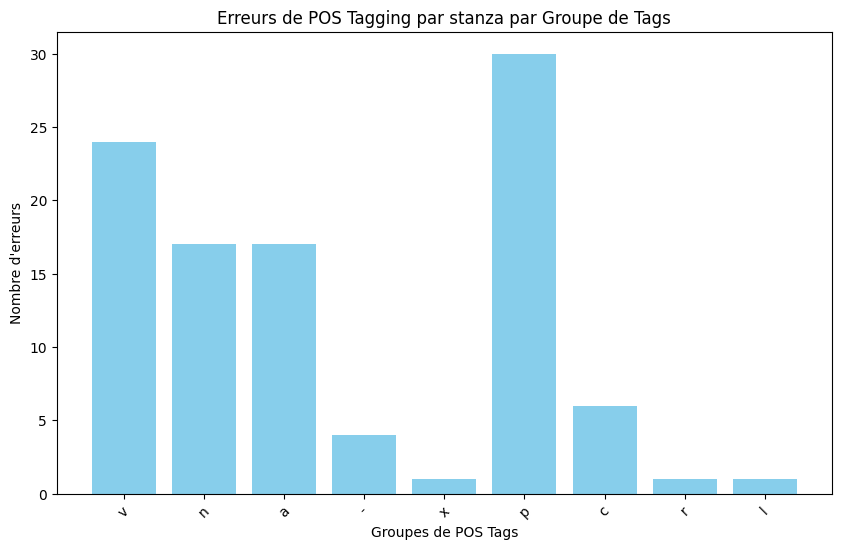

In [17]:
import matplotlib.pyplot as plt

pos_groups = list(pos_error_counts.keys())
errors = list(pos_error_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pos_groups, errors, color='skyblue')
plt.xlabel('Groupes de POS Tags')
plt.ylabel('Nombre d\'erreurs')
plt.title('Erreurs de POS Tagging par stanza par Groupe de Tags')
plt.xticks(rotation=45)
plt.show()

In [18]:
import csv
output_file = '/content/stanza_results.csv'

# Écriture dans le fichier CSV
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # En-têtes
    writer.writerow(['Word', 'TB Lemma', 'Stanza Lemma', 'TB POS', 'Stanza POS'])

    for error in all_errors['lemma_errors']:
        writer.writerow([error['word'], error['tb_lemma'], error['stanza_lemma'], '', ''])

    for error in all_errors['pos_errors']:
        writer.writerow([error['word'], '', '', error['tb_pos'], error['stanza_pos']])

In [19]:
def compare_global_annotations(tb_sentence, stanza_doc):
    annotations = []

    # Parcourir chaque mot dans le treebank sentence
    for tb_word in tb_sentence[2]:
        tb_text = tb_word['form']
        tb_lemma = tb_word.get('lemma')
        tb_pos_short = tb_word['postag'][0] if tb_word['postag'] else None

        # Trouver le token correspondant dans stanza_doc
        stanza_token = next((token for sent in stanza_doc.sentences for token in sent.tokens if token.text == tb_text), None)

        if stanza_token:
            stanza_lemma = stanza_token.words[0].lemma
            stanza_pos_short = stanza_token.words[0].xpos[0] if stanza_token.words[0].xpos else None

            lemma_match = tb_lemma == stanza_lemma
            pos_match = tb_pos_short == stanza_pos_short

            annotations.append({
                'word': tb_text,
                'tb_lemma': tb_lemma,
                'stanza_lemma': stanza_lemma,
                'lemma_match': lemma_match,
                'tb_pos_short': tb_pos_short,
                'stanza_pos_short': stanza_pos_short,
                'pos_match': pos_match
            })

    return annotations


In [21]:
output_file_stanza = '/content/stanza_results.csv'

with open(output_file_stanza, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Word', 'TB Lemma', 'Stanza Lemma', 'Lemma Match', 'TB POS Short', 'Stanza POS Short', 'POS Match'])

    for tb_sentence, stanza_tuple in zip(treebank_sentences, stanza_sentences):
        file_id_stanza, index_stanza, stanza_doc = stanza_tuple
        if file_id_stanza == tb_sentence[0] and index_stanza == tb_sentence[1]:
            try:
                annotations = compare_global_annotations(tb_sentence, stanza_doc)
                for annotation in annotations:
                    writer.writerow([annotation['word'], annotation['tb_lemma'], annotation['stanza_lemma'],
                                     annotation['lemma_match'], annotation['tb_pos_short'], annotation['stanza_pos_short'],
                                     annotation['pos_match']])
            except ValueError as e:
                print(f"Erreur dans les données : {e}")
